# Ames Housing Price Predictions

## Problem Statement

In this project, we analyse the Ames Housing Dataset provided from the Ames Assessor's Office to determine what features affect the sales prices of houses in Ames, IA. Through the development of an appropriate regression model, the sales prices of houses will be predicted using various features (variables) of houses from the Ames Housing Dataset.

Ultimately, we aim to provide a useful prediction model for real estate agents to predict house prices for their existing and potential clients, providing useful insights on the effect of different features on real estate prices through our model.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

plt.style.use('seaborn')
%matplotlib inline
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 500

## Load Data

In [2]:
train_df = pd.read_csv('../data/train.csv')
train_df.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [3]:
test_df = pd.read_csv('../data/test.csv')
test_df.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New


## Data cleaning

In [4]:
#drop Id and PID as they will not affect the price of housing
train_df.drop(columns=['Id','PID'], axis=1, inplace=True)

In [5]:
#rename columns to lower case and replace spaces with _
train_df.rename(columns=lambda s : s.lower().replace(' ', '_'), inplace=True)

### Missing values

In [6]:
#check for null values
train_df.isnull().sum()

ms_subclass           0
ms_zoning             0
lot_frontage        330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
utilities             0
lot_config            0
land_slope            0
neighborhood          0
condition_1           0
condition_2           0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod/add        0
roof_style            0
roof_matl             0
exterior_1st          0
exterior_2nd          0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type_1       55
bsmtfin_sf_1          1
bsmtfin_type_2       56
bsmtfin_sf_2          1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc            0
central_air           0
electrical      

In [7]:
#replace na with the mean seems to be the better option than setting it to zero
train_df['lot_frontage'].fillna(train_df['lot_frontage'].mean(),
                                inplace=True)

In [8]:
#replace na with NoAlley
train_df['alley'].fillna('NoAlley', inplace=True)

In [9]:
#replace na with None
train_df['mas_vnr_type'].fillna('None', inplace=True)

In [10]:
#replace na with 0
train_df['mas_vnr_area'].fillna(0, inplace=True)

In [11]:
train_df['bsmt_qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: bsmt_qual, dtype: int64

In [12]:
#Basement quality is an ordinal variable therefore giving it a numeric score 
train_df['bsmt_qual'] = train_df['bsmt_qual'].map({np.nan:0, 
                                                   'Po': 1, 
                                                   'Fa': 2, 
                                                   'TA': 3, 
                                                   'Gd': 4,
                                                   'Ex': 5})

In [13]:
train_df['bsmt_qual'].value_counts()

3    887
4    864
5    184
2     60
0     55
1      1
Name: bsmt_qual, dtype: int64

In [14]:
train_df['bsmt_cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: bsmt_cond, dtype: int64

In [15]:
#Basement condition is an ordinal variable therefore giving it a numeric score seems a better choice
train_df['bsmt_cond'] = train_df['bsmt_cond'].map({np.nan:0, 'Po': 1, 
                                                   'Fa': 2, 'TA': 3,
                                                   'Gd': 4, 'Ex': 5})
train_df['bsmt_cond'].value_counts()

3    1834
4      89
2      65
0      55
1       5
5       3
Name: bsmt_cond, dtype: int64

In [16]:
train_df['bsmt_exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64

In [17]:
#Basement exposure is an ordinal variable therefore giving it a numeric score seems a better choice
train_df['bsmt_exposure'] = train_df['bsmt_exposure'].map({np.nan:0, 'No': 1, 
                                                           'Mn': 2, 'Av': 3,
                                                           'Gd': 4})
train_df['bsmt_exposure'].value_counts()

1    1339
3     288
4     203
2     163
0      58
Name: bsmt_exposure, dtype: int64

In [18]:
train_df['bsmtfin_type_1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: bsmtfin_type_1, dtype: int64

In [19]:
#Basement Fin Type 1 is an ordinal variable therefore giving it a numeric score seems a better choice
train_df['bsmtfin_type_1'] = train_df['bsmtfin_type_1'].map({np.nan:0, 'Unf': 1,
                                                             'LwQ': 2, 'Rec': 3, 
                                                             'BLQ': 4, 'ALQ': 5, 
                                                             'GLQ': 6})
train_df['bsmtfin_type_1'].value_counts()

6    615
1    603
5    293
4    200
3    183
2    102
0     55
Name: bsmtfin_type_1, dtype: int64

In [20]:
#Since it's only 1 row with multiple missing value, i decided to drop it
train_df[train_df['bsmtfin_sf_1'].isnull()]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
1327,20,RM,99.0,5940,Pave,NoAlley,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,0,0,0,0,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [21]:
train_df.dropna(subset=['bsmtfin_sf_1'], inplace=True)

In [22]:
train_df['bsmtfin_type_2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: bsmtfin_type_2, dtype: int64

In [23]:
##Basement Fin type 2 is an ordinal variable therefore giving it a numeric score seems a better choice
train_df['bsmtfin_type_2'] = train_df['bsmtfin_type_2'].map({np.nan:0, 'Unf': 1, 'LwQ': 2, 
                                                             'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
train_df['bsmtfin_type_2'].value_counts()

1    1749
3      80
2      60
0      55
4      48
5      35
6      23
Name: bsmtfin_type_2, dtype: int64

In [24]:
#Since it's only 1 row with multiple missing value, i decided to drop it
train_df[train_df['bsmt_full_bath'].isnull()]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,20,RL,123.0,47007,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,0,0,0,0,0.0,0,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700


In [25]:
train_df.dropna(subset=['bsmt_full_bath'], inplace=True)

In [26]:
train_df['fireplace_qu'].value_counts()

Gd    522
TA    407
Fa     59
Po     31
Ex     31
Name: fireplace_qu, dtype: int64

In [27]:
#fireplace qu is an ordinal variable therefore giving it a numeric score seems a better choice
train_df['fireplace_qu'] = train_df['fireplace_qu'].map({np.nan:0, 'Po': 1, 'Fa': 2, 'TA': 3, 
                                                         'Gd': 4, 'Ex': 5})
train_df['fireplace_qu'].value_counts()

0    999
4    522
3    407
2     59
1     31
5     31
Name: fireplace_qu, dtype: int64

In [28]:
train_df['garage_type'].value_counts()

Attchd     1212
Detchd      535
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

In [29]:
#replace na with NoGarage
train_df['garage_type'].fillna('NoGarage', inplace=True)

In [30]:
#Does not make sense to set to 0 as those missing value are houses with no garage.
#will set it to the same year as the house was built
train_df['garage_yr_blt'].fillna(train_df['year_built'], inplace=True)

In [31]:
#garage_finish is an ordinal variable therefore giving it a numeric score seems a better choice
train_df['garage_finish'] = train_df['garage_finish'].map({np.nan: 0, 'Unf': 1, 'RFn': 2, 'Fin':3})
train_df['garage_finish'].value_counts()

1    847
2    579
3    509
0    114
Name: garage_finish, dtype: int64

In [32]:
train_df[['garage_finish','garage_cars', 'garage_type', 'garage_area', 'garage_cond']][train_df['garage_cars'].isnull()]

,garage_finish,garage_cars,garage_type,garage_area,garage_cond
1712,0,NaN,Detchd,NaN,NaN


In [33]:
#decide to drop id 1712 as it has multiple missing value
train_df.dropna(subset=['garage_cars'], inplace=True)

In [34]:
#garage_qual is an ordinal variable therefore giving it a numeric score seems a better choice
train_df['garage_qual'] = train_df['garage_qual'].map({np.nan:0, 'Po': 1, 'Fa': 2, 'TA': 3, 
                                                         'Gd': 4, 'Ex': 5})
train_df['garage_qual'].value_counts()

3    1830
0     113
2      82
4      18
5       3
1       2
Name: garage_qual, dtype: int64

In [35]:
train_df['garage_cond'].value_counts()

TA    1866
Fa      47
Gd      12
Po       8
Ex       2
Name: garage_cond, dtype: int64

In [36]:
#garage_cond is an ordinal variable therefore giving it a numeric score seems a better choice
train_df['garage_cond'] = train_df['garage_cond'].map({np.nan:0, 'Po': 1, 'Fa': 2, 'TA': 3, 
                                                         'Gd': 4, 'Ex': 5})
train_df['garage_cond'].value_counts()

3    1866
0     113
2      47
4      12
1       8
5       2
Name: garage_cond, dtype: int64

In [37]:
train_df['pool_qc'].value_counts()

Gd    4
Fa    2
TA    2
Ex    1
Name: pool_qc, dtype: int64

In [38]:
#pool_qc is an ordinal variable therefore giving it a numeric score seems a better choice
train_df['pool_qc'] = train_df['pool_qc'].map({np.nan:0, 'Fa': 1, 'TA': 2, 
                                                         'Gd': 3, 'Ex':4})
train_df['pool_qc'].value_counts()

0    2039
3       4
1       2
2       2
4       1
Name: pool_qc, dtype: int64

In [39]:
train_df['fence'].value_counts()

MnPrv    225
GdPrv     83
GdWo      80
MnWw      10
Name: fence, dtype: int64

In [40]:
#fence is an ordinal variable therefore giving it a numeric score seems a better choice
train_df['fence'] = train_df['fence'].map({np.nan:0, 'MnWw': 1, 'GdWo': 2, 
                                                         'MnPrv': 3, 'GdPrv':4})
train_df['fence'].value_counts()

0    1650
3     225
4      83
2      80
1      10
Name: fence, dtype: int64

In [41]:
train_df['misc_feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: misc_feature, dtype: int64

In [42]:
#replace na with NoFeature
train_df['misc_feature'].fillna('NoFeature', inplace=True)

In [43]:
train_df.isnull().sum()

ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bat

## Ordinal and Nominal variables editing

### Ordinal variables
1. lot_shape
2. utilities
3. exter_qual
4. exter_cond
5. heating_qc
6. kitchen_qual
7. functional
8. paved_drive
9. electrical

In [44]:
#Lot shape is an ordinal variable
train_df['lot_shape'].value_counts()

Reg    1294
IR1     690
IR2      55
IR3       9
Name: lot_shape, dtype: int64

In [45]:
train_df['lot_shape'] = train_df['lot_shape'].map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3})

In [46]:
#Utilities
train_df['utilities'].value_counts()

AllPub    2046
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64

In [47]:
train_df['utilities'] = train_df['utilities'].map({'ELO': 0, 'NoSewr': 1, 'NoSeWa': 2, 'AllPub': 3})

In [48]:
#exter_qual
train_df['exter_qual'].value_counts()

TA    1244
Gd     697
Ex      81
Fa      26
Name: exter_qual, dtype: int64

In [49]:
train_df['exter_qual'] = train_df['exter_qual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 
                                                         'Gd': 3, 'Ex':4})

In [50]:
#exter_cond
train_df['exter_cond'].value_counts()

TA    1775
Gd     215
Fa      49
Ex       7
Po       2
Name: exter_cond, dtype: int64

In [51]:
train_df['exter_cond'] = train_df['exter_cond'].map({'Po': 0, 'Fa': 1, 'TA': 2, 
                                                         'Gd': 3, 'Ex':4})

In [52]:
#heating_qc
train_df['heating_qc'].value_counts()

Ex    1064
TA     595
Gd     319
Fa      67
Po       3
Name: heating_qc, dtype: int64

In [53]:
train_df['heating_qc'] = train_df['heating_qc'].map({'Po': 0, 'Fa': 1, 'TA': 2, 
                                                         'Gd': 3, 'Ex':4})

In [54]:
#kitchen_qual
train_df['kitchen_qual'].value_counts()

TA    1046
Gd     805
Ex     150
Fa      47
Name: kitchen_qual, dtype: int64

In [55]:
train_df['kitchen_qual'] = train_df['kitchen_qual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 
                                                         'Gd': 3, 'Ex':4})

In [56]:
#functional
train_df['functional'].value_counts()

Typ     1912
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: functional, dtype: int64

In [57]:
train_df['functional'] = train_df['functional'].map({'Sal': 0, 'Sev': 1, 'Maj2': 2,
                                                     'Maj1': 3, 'Mod':4, 'Min2': 5, 'Min1': 6, 'Typ': 7})

In [58]:
#paved_drive
train_df['paved_drive'].value_counts()

Y    1858
N     151
P      39
Name: paved_drive, dtype: int64

In [59]:
train_df['paved_drive'] = train_df['paved_drive'].map({'N': 0, 'P': 1, 'Y': 3})

In [60]:
#electrical
train_df['electrical'] = train_df['electrical'].map({'Mix':  0, 'FuseP': 1, 'FuseF': 2,
                                                     'FuseA': 3, 'SBrkr': 4})
train_df['electrical'].value_counts()

4    1866
3     139
2      35
1       7
0       1
Name: electrical, dtype: int64

### Nominal variables
1. ms_zoning
2. street
3. alley
4. land_contour
5. lot_config
6. land_slope
7. neighborhood
8. condition_1
9. condition_2
10. bldg_type
11. house_style
12. roof_style
13. roof_matl
14. exterior_1st
15. exterior_2nd
16. mas_vnr_type
17. foundation
18. heating
19. central_air
20. garage_type,
21. misc_feature,
22. sale_type

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      2048 non-null   int64  
 1   ms_zoning        2048 non-null   object 
 2   lot_frontage     2048 non-null   float64
 3   lot_area         2048 non-null   int64  
 4   street           2048 non-null   object 
 5   alley            2048 non-null   object 
 6   lot_shape        2048 non-null   int64  
 7   land_contour     2048 non-null   object 
 8   utilities        2048 non-null   int64  
 9   lot_config       2048 non-null   object 
 10  land_slope       2048 non-null   object 
 11  neighborhood     2048 non-null   object 
 12  condition_1      2048 non-null   object 
 13  condition_2      2048 non-null   object 
 14  bldg_type        2048 non-null   object 
 15  house_style      2048 non-null   object 
 16  overall_qual     2048 non-null   int64  
 17  overall_cond  

In [62]:
nominal_var = ['ms_zoning', 'street', 'alley', 'land_contour', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air',
        'garage_type', 'misc_feature', 'sale_type']

In [63]:
# #One hot encoding for all the nominal variables
# train_df = pd.get_dummies(data=train_df, columns=nominal_var)

In [64]:
train_df.shape

(2048, 79)

In [65]:
# # Drop variables that is not in the test.csv as it will not be use in the model

# features_to_drop = ['condition_2_Feedr', 'condition_2_RRAe', 'condition_2_RRAn',
#                    'condition_2_RRNn', 'exterior_1st_CBlock', 'exterior_1st_ImStucc',
#                    'exterior_1st_Stone', 'exterior_2nd_Stone', 'heating_OthW',
#                    'heating_Wall', 'misc_feature_Gar2', 'misc_feature_TenC',
#                    'ms_zoning_C (all)', 'neighborhood_GrnHill',
#                    'neighborhood_Landmrk', 'roof_matl_CompShg', 'roof_matl_Membran']

# train_df.drop(columns=features_to_drop, inplace=True)
# train_df.shape

## Load and Clean Data on test.csv

In [66]:
test_df.shape

(879, 80)

In [67]:
#drop ID and PID
test_df.drop(['Id','PID'], axis=1, inplace=True)

In [68]:
#rename columns to lower case and replace spaces with _
test_df.rename(columns=lambda s : s.lower().replace(' ', '_'), inplace=True)

### Missing value

In [69]:
#check for null value
test_df.isnull().sum()

ms_subclass          0
ms_zoning            0
lot_frontage       160
lot_area             0
street               0
alley              821
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type         1
mas_vnr_area         1
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual           25
bsmt_cond           25
bsmt_exposure       25
bsmtfin_type_1      25
bsmtfin_sf_1         0
bsmtfin_type_2      25
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
heating              0
heating_qc           0
central_air          0
electrical           1
1st_flr_sf           0
2nd_flr_sf 

In [70]:
#replace na with the mean seems to be the best method
test_df['lot_frontage'].fillna(test_df['lot_frontage'].mean(), inplace=True)

In [71]:
#replace na with NoAlley
test_df['alley'].fillna('NoAlley', inplace=True)

In [72]:
#replace na with None
test_df['mas_vnr_type'].fillna('None', inplace=True)

In [73]:
#replace na with 0
test_df['mas_vnr_area'].fillna(0, inplace=True)

In [74]:
#Basement quality is an ordinal variable therefore giving it a numeric score seems a better choice
test_df['bsmt_qual'] = test_df['bsmt_qual'].map({np.nan:0, 'Po': 1, 'Fa': 2, 
                                                 'TA': 3, 'Gd': 4, 'Ex': 5})
test_df['bsmt_qual'].value_counts()

3    396
4    355
5     74
2     28
0     25
1      1
Name: bsmt_qual, dtype: int64

In [75]:
#Basement condition is an ordinal variable therefore giving it a numeric score seems a better choice
test_df['bsmt_cond'] = test_df['bsmt_cond'].map({np.nan:0, 'Po': 1, 
                                                 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
test_df['bsmt_cond'].value_counts()

3    782
2     39
4     33
0     25
Name: bsmt_cond, dtype: int64

In [76]:
#Basement exposure is an ordinal variable therefore giving it a numeric score seems a better choice
test_df['bsmt_exposure'] = test_df['bsmt_exposure'].map({np.nan:0, 'No': 1, 
                                                         'Mn': 2, 'Av': 3, 'Gd': 4})
test_df['bsmt_exposure'].value_counts()

1    567
3    130
4     81
2     76
0     25
Name: bsmt_exposure, dtype: int64

In [77]:
#Basement Fin Type 1 is an ordinal variable therefore giving it a numeric score seems a better choice
test_df['bsmtfin_type_1'] = test_df['bsmtfin_type_1'].map({np.nan:0, 'Unf': 1, 'LwQ': 2, 
                                                             'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
test_df['bsmtfin_type_1'].value_counts()

1    248
6    244
5    136
3    105
4     69
2     52
0     25
Name: bsmtfin_type_1, dtype: int64

In [78]:
##Basement Fin type 2 is an ordinal variable therefore giving it a numeric score seems a better choice
test_df['bsmtfin_type_2'] = test_df['bsmtfin_type_2'].map({np.nan:0, 'Unf': 1, 'LwQ': 2, 
                                                             'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
test_df['bsmtfin_type_2'].value_counts()

1    750
2     29
3     26
0     25
4     20
5     18
6     11
Name: bsmtfin_type_2, dtype: int64

In [79]:
#electrical
test_df['electrical'] = test_df['electrical'].map({np.nan:  0, 'FuseP': 1, 'FuseF': 2,
                                                     'FuseA': 3, 'SBrkr': 4})
test_df['electrical'].value_counts()

4    814
3     48
2     15
0      1
1      1
Name: electrical, dtype: int64

In [80]:
#fireplace qu is an ordinal variable therefore giving it a numeric score seems a better choice
test_df['fireplace_qu'] = test_df['fireplace_qu'].map({np.nan:0, 'Po': 1, 'Fa': 2, 'TA': 3, 
                                                         'Gd': 4, 'Ex': 5})
test_df['fireplace_qu'].value_counts()

0    422
4    221
3    193
2     16
1     15
5     12
Name: fireplace_qu, dtype: int64

In [81]:
#replace na with NoGarage
test_df['garage_type'].fillna('NoGarage', inplace=True)

In [82]:
#will set it to the same year as the house was built
test_df['garage_yr_blt'].fillna(test_df['year_built'], inplace=True)

In [83]:
#garage_finish is an ordinal variable therefore giving it a numeric score seems a better choice
test_df['garage_finish'] = test_df['garage_finish'].map({np.nan: 0, 'Unf': 1, 
                                                         'RFn': 2, 'Fin':3})
test_df['garage_finish'].value_counts()

1    382
2    233
3    219
0     45
Name: garage_finish, dtype: int64

In [84]:
#garage_qual is an ordinal variable therefore giving it a numeric score seems a better choice
test_df['garage_qual'] = test_df['garage_qual'].map({np.nan:0, 'Po': 1, 'Fa': 2, 'TA': 3, 
                                                         'Gd': 4, 'Ex': 5})
test_df['garage_qual'].value_counts()

3    783
0     45
2     42
4      6
1      3
Name: garage_qual, dtype: int64

In [85]:
#garage_cond is an ordinal variable therefore giving it a numeric score seems a better choice
test_df['garage_cond'] = test_df['garage_cond'].map({np.nan:0, 'Po': 1, 'Fa': 2, 'TA': 3, 
                                                         'Gd': 4, 'Ex': 5})
test_df['garage_cond'].value_counts()

3    797
0     45
2     27
1      6
4      3
5      1
Name: garage_cond, dtype: int64

In [86]:
#pool_qc is an ordinal variable therefore giving it a numeric score seems a better choice
test_df['pool_qc'] = test_df['pool_qc'].map({np.nan:0, 'Fa': 1, 'TA': 2, 
                                                         'Gd': 3, 'Ex':4})
test_df['pool_qc'].value_counts()

0    875
4      3
2      1
Name: pool_qc, dtype: int64

In [87]:
#fence is an ordinal variable therefore giving it a numeric score seems a better choice
test_df['fence'] = test_df['fence'].map({np.nan:0, 'MnWw': 1, 'GdWo': 2, 
                                                         'MnPrv': 3, 'GdPrv':4})
test_df['fence'].value_counts()

0    707
3    103
4     35
2     32
1      2
Name: fence, dtype: int64

In [88]:
#replace na with NoFeature
test_df['misc_feature'].fillna('NoFeature', inplace=True)

In [89]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      879 non-null    int64  
 1   ms_zoning        879 non-null    object 
 2   lot_frontage     879 non-null    float64
 3   lot_area         879 non-null    int64  
 4   street           879 non-null    object 
 5   alley            879 non-null    object 
 6   lot_shape        879 non-null    object 
 7   land_contour     879 non-null    object 
 8   utilities        879 non-null    object 
 9   lot_config       879 non-null    object 
 10  land_slope       879 non-null    object 
 11  neighborhood     879 non-null    object 
 12  condition_1      879 non-null    object 
 13  condition_2      879 non-null    object 
 14  bldg_type        879 non-null    object 
 15  house_style      879 non-null    object 
 16  overall_qual     879 non-null    int64  
 17  overall_cond    

## Ordinal and Nominal Features editing

### Ordinal Variables
1. lot_shape
2. utilities
3. exter_qual
4. exter_cond
5. heating_qc
6. kitchen_qual
7. functional
8. paved_drive

In [90]:
ord_var = ['lot_shape', 'utilities', 'exter_qual','heating_qc','kitchen_qual', 'functional', 'paved_drive']

In [91]:
#lot_shape
test_df['lot_shape'].value_counts()

Reg    564
IR1    287
IR2     21
IR3      7
Name: lot_shape, dtype: int64

In [92]:
test_df['lot_shape'] = test_df['lot_shape'].map({'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3})
test_df['lot_shape'].value_counts()

3    564
2    287
1     21
0      7
Name: lot_shape, dtype: int64

In [93]:
#Utilities
test_df['utilities'].value_counts()

AllPub    878
NoSewr      1
Name: utilities, dtype: int64

In [94]:
test_df['utilities'] = test_df['utilities'].map({'ELO': 0, 'NoSewr': 1, 'NoSeWa': 2, 'AllPub': 3})
test_df['utilities'].value_counts()

3    878
1      1
Name: utilities, dtype: int64

In [95]:
#exter_qual
test_df['exter_qual'].value_counts()

TA    552
Gd    292
Ex     26
Fa      9
Name: exter_qual, dtype: int64

In [96]:
test_df['exter_qual'] = test_df['exter_qual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 
                                                         'Gd': 3, 'Ex':4})
test_df['exter_qual'].value_counts()

2    552
3    292
4     26
1      9
Name: exter_qual, dtype: int64

In [97]:
#exter_cond
test_df['exter_cond'].value_counts()

TA    771
Gd     84
Fa     18
Ex      5
Po      1
Name: exter_cond, dtype: int64

In [98]:
test_df['exter_cond'] = test_df['exter_cond'].map({'Po': 0, 'Fa': 1, 'TA': 2, 
                                                         'Gd': 3, 'Ex':4})
test_df['exter_cond'].value_counts()

2    771
3     84
1     18
4      5
0      1
Name: exter_cond, dtype: int64

In [99]:
#heating_qc
test_df['heating_qc'].value_counts()

Ex    430
TA    267
Gd    157
Fa     25
Name: heating_qc, dtype: int64

In [100]:
test_df['heating_qc'] = test_df['heating_qc'].map({'Po': 0, 'Fa': 1, 'TA': 2, 
                                                         'Gd': 3, 'Ex':4})
test_df['heating_qc'].value_counts()

4    430
2    267
3    157
1     25
Name: heating_qc, dtype: int64

In [101]:
#kitchen_qual
test_df['kitchen_qual'].value_counts()

TA    447
Gd    354
Ex     54
Fa     23
Po      1
Name: kitchen_qual, dtype: int64

In [102]:
test_df['kitchen_qual'] = test_df['kitchen_qual'].map({'Po': 0, 'Fa': 1, 'TA': 2, 
                                                         'Gd': 3, 'Ex':4})

In [103]:
#functional
test_df['functional'].value_counts()

Typ     813
Min2     28
Min1     23
Maj1      7
Mod       6
Maj2      2
Name: functional, dtype: int64

In [104]:
test_df['functional'] = test_df['functional'].map({'Sal': 0, 'Sev': 1, 'Maj2': 2,
                                                     'Maj1': 3, 'Mod':4, 'Min2': 5, 'Min1': 6, 'Typ': 7})

In [105]:
#paved_drive
test_df['paved_drive'].value_counts()

Y    791
N     65
P     23
Name: paved_drive, dtype: int64

In [106]:
test_df['paved_drive'] = test_df['paved_drive'].map({'N': 0, 'P': 1, 'Y': 3})

### Nominal Variables
1. ms_zoning
2. street
3. alley
4. land_contour
5. lot_config
6. land_slope
7. neighborhood
8. condition_1
9. condition_2
10. bldg_type
11. house_style
12. roof_style
13. roof_matl
14. exterior_1st
15. exterior_2nd
16. mas_vnr_type
17. foundation
18. heating
19. central_air
20. garage_type,
21. misc_feature,
22. sale_type


In [107]:
# #One hot encoding for all the nominal variables
# test_df = pd.get_dummies(data=test_df, columns=nominal_var)

In [108]:
test_df.shape, train_df.shape

((879, 78), (2048, 79))

Null or missing values were addressed by either by removing them or through imputations. 

Nominal variables comprises a finite set of discrete values with no relationship between values were one hot encoded, that is by creating new binary variable for each unique value. 

Ordinal variables comprises a finite set of discrete values with a ranked ordering between values. They were assigned a value 0 to 5 depending on the significance level of each value.

## EDA
Overview of all the features

In [109]:
train_df.describe()

,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,57.038574,69.023543,10049.675293,2.596191,2.998535,6.114258,5.560547,1971.751465,1984.193848,98.770996,2.406738,2.085938,3.493164,2.932129,1.630859,3.567383,442.464844,1.275879,48.005859,568.130859,1058.601562,3.159180,3.885742,1163.431152,329.378906,5.520996,1498.331055,0.427734,0.063477,1.576660,0.371094,2.842773,1.042969,2.516602,6.435059,6.842773,0.590820,1.764160,1976.757812,1.724609,1.776855,473.692871,2.804199,2.811523,2.740723,93.886230,47.444824,22.501465,2.595215,16.535645,2.401367,0.010742,0.574707,51.649902,6.222168,2007.775879,181484.252441
std,42.839004,21.274118,6697.167566,0.566553,0.049401,1.426126,1.104349,30.174112,21.033925,174.411461,0.588187,0.373051,0.895602,0.565049,1.078939,2.123990,461.319862,0.949411,165.074675,444.958855,448.999749,0.963959,0.402280,392.294626,425.680677,51.105842,497.948344,0.522715,0.251763,0.548553,0.501083,0.825631,0.209937,0.665074,1.557145,0.683883,0.637957,1.806882,27.071436,0.898536,0.764702,215.972053,0.719090,0.713896,0.820274,128.597923,66.393358,59.738209,25.247901,57.412746,37.810135,0.173703,1.211928,573.810601,2.745331,1.312844,79248.657891
min,20.000000,21.000000,1300.000000,0.000000,1.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,60.000000,7500.000000,2.000000,3.000000,5.000000,5.000000,1954.000000,1964.750000,0.000000,2.000000,2.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,220.000000,793.000000,2.000000,4.000000,879.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2.000000,5.000000,7.000000,0.000000,0.000000,1959.000000,1.000000,1.000000,319.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129837.500000
50%,50.000000,69.055200,9432.000000,3.000000,3.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,2.000000,2.000000,4.000000,3.000000,1.000000,4.000000,368.000000,1.000000,0.000000,475.000000,995.500000,4.000000,4.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,2.000000,6.000000,7.000000,1.000000,1.000000,1978.000000,2.000000,2.000000,480.000000,3.0

In [110]:
def subplot_scatter(dataframe, target, list_of_columns, ):
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=3, figsize=(20, nrows*5.5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.scatterplot(y=dataframe[target], x=dataframe[column],ax=ax[i])
        

In [111]:
qualitative_features = [col for col in train_df.columns if col not in nominal_var if col not in ord_var]

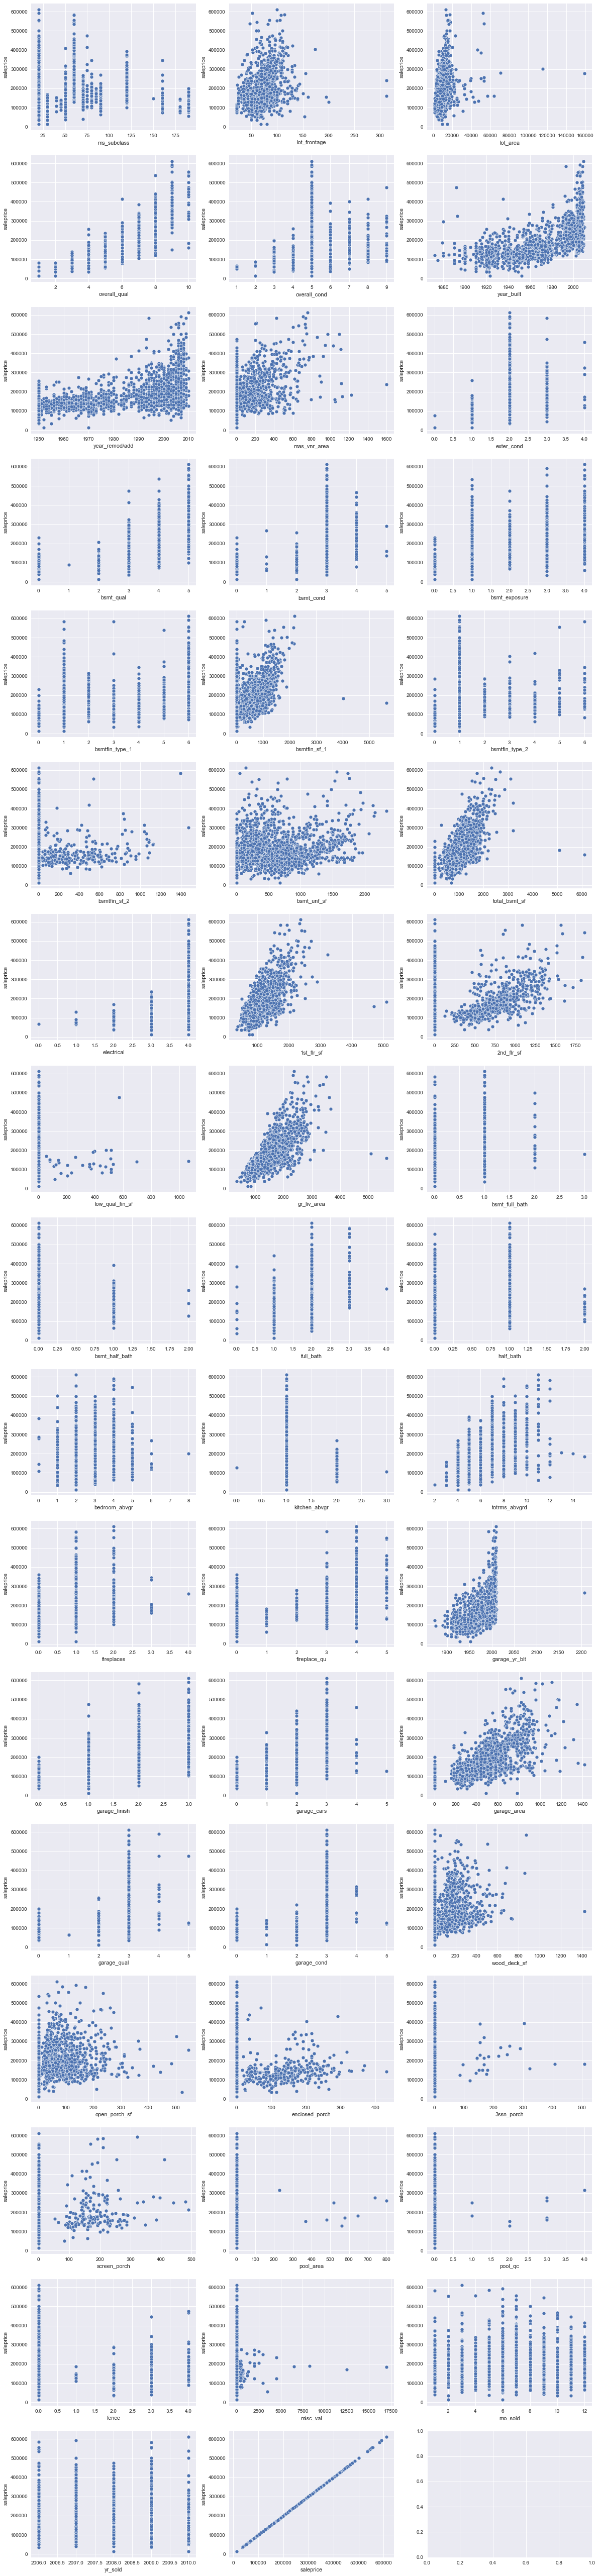

In [112]:
subplot_scatter(train_df,'saleprice', qualitative_features)

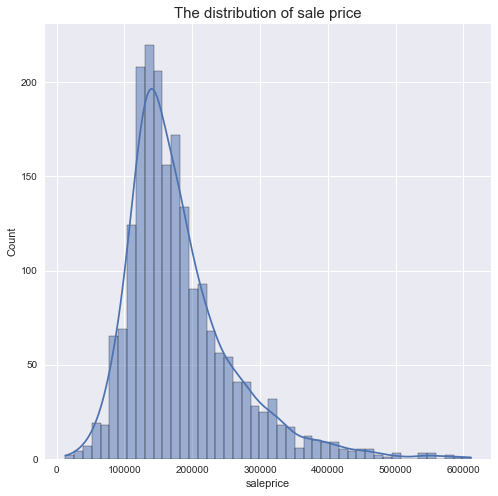

In [113]:
plt.figure(figsize=(8,8))
plt.title('The distribution of sale price', fontsize=15)
sns.histplot(x='saleprice', data=train_df, kde=True);

### The distribution of the sale price is right skewed, indicating that there are some houses were sold at a very high price. The mean sale price is around 181,500 with a standard deviation of 79,248. Most of the houses sold between 120,000 to 214,000. The highest sale price is 611,657 and the lowest is at 12,789. 

## Outliers

Based on the scatterplot above, there are some data points that required further investigation as they deviate too far away.



In [114]:
def scatter_plot(df, x, y, title):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(title)

#### Lot frontage

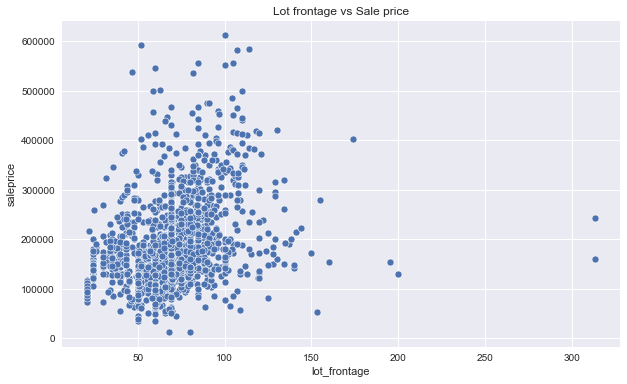

In [115]:
scatter_plot(train_df, 'lot_frontage', 'saleprice', 'Lot frontage vs Sale price')

lot_frontage have 2 data points that are above 300sq ft which is almost 4.5 times larger than the median and should be remove.


In [116]:
lot_frontage_outlier = train_df.loc[train_df['lot_frontage'] > 300]
train_df.drop(lot_frontage_outlier.index, inplace=True)

#### Lot area

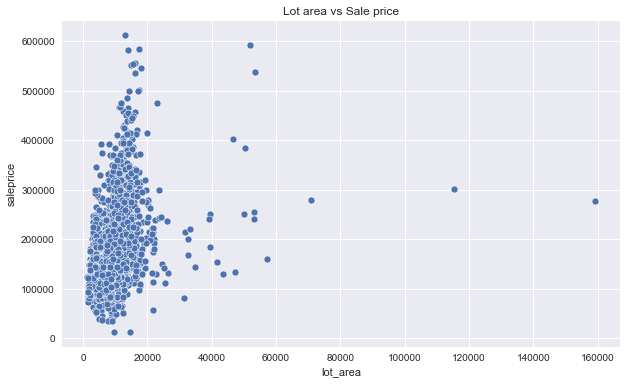

In [117]:
scatter_plot(train_df, 'lot_area', 'saleprice', 'Lot area vs Sale price')

2 data points are above 10,000 sq ft and should be removed.

In [118]:
lot_area_outlier = train_df.loc[train_df['lot_area'] > 10000]
train_df.drop(lot_area_outlier.index, inplace=True)

#### Masonry veneer type

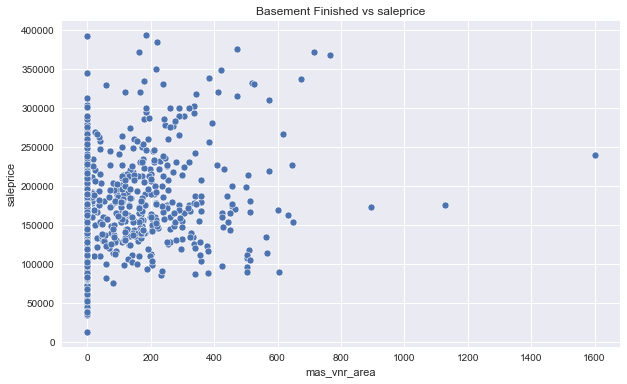

In [119]:
scatter_plot(train_df, 'mas_vnr_area', 'saleprice', 'Basement Finished vs saleprice')

In [120]:
mas_vnr_area_outlier = train_df.loc[train_df['mas_vnr_area'] > 1400]
train_df.drop(mas_vnr_area_outlier.index, inplace=True)

#### Total basement sq ft

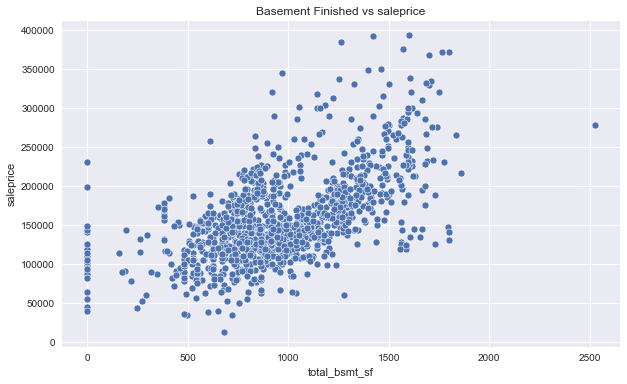

In [121]:
scatter_plot(train_df, 'total_bsmt_sf', 'saleprice', 'Basement Finished vs saleprice')

In [122]:
total_bsmt_sf_outlier = train_df.loc[train_df['total_bsmt_sf'] > 2500]
train_df.drop(total_bsmt_sf_outlier.index, inplace=True)

#### Garage year built

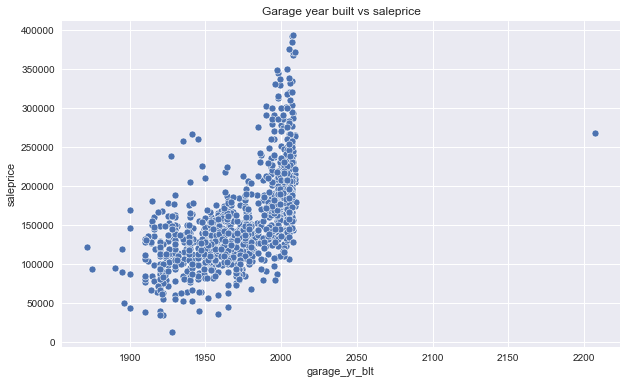

In [123]:
scatter_plot(train_df, 'garage_yr_blt', 'saleprice', 'Garage year built vs saleprice')

In [124]:
garage_yr_blt_outlier = train_df.loc[train_df['garage_yr_blt'] > 2200]
train_df.drop(garage_yr_blt_outlier.index, inplace=True)

In [125]:
train_df.isnull().sum()

ms_subclass        0
ms_zoning          0
lot_frontage       0
lot_area           0
street             0
alley              0
lot_shape          0
land_contour       0
utilities          0
lot_config         0
land_slope         0
neighborhood       0
condition_1        0
condition_2        0
bldg_type          0
house_style        0
overall_qual       0
overall_cond       0
year_built         0
year_remod/add     0
roof_style         0
roof_matl          0
exterior_1st       0
exterior_2nd       0
mas_vnr_type       0
mas_vnr_area       0
exter_qual         0
exter_cond         0
foundation         0
bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1     0
bsmtfin_sf_1       0
bsmtfin_type_2     0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
heating            0
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
2nd_flr_sf         0
low_qual_fin_sf    0
gr_liv_area        0
bsmt_full_bath     0
bsmt_half_bat

## One hot encoding for catergorical variables 

In [126]:
# #One hot encoding for all the nominal variables
train_df_ohe = pd.get_dummies(data=train_df, columns=nominal_var)

In [127]:
test_df_ohe = pd.get_dummies(data=test_df, columns=nominal_var)

In [128]:
common_cols = list(set(train_df_ohe.columns).intersection(set(test_df_ohe.columns)))

In [129]:
test_df_ohe = test_df_ohe[common_cols].copy()

In [130]:
common_cols.append('saleprice')

In [131]:
train_df_ohe = train_df_ohe[common_cols].copy()

### Features Selection

#features with correlation > 0.5 with saleprice 
corr = abs(train_df_ohe.corr()['saleprice'])
features = corr[corr > 0.3]
features

plt.figure(figsize = (15,15))
plt.title('Correlation Between Features', size=12)
matrix = np.triu(train_df_ohe[features.index].corr())
sns.heatmap(train_df_ohe[features.index].corr(), annot=True, mask=matrix, cmap= 'coolwarm', square=True);

##  Create features matrix (`X`) and target vector (`y`)

In [132]:
features = [features for features in common_cols if features != 'saleprice']
target = 'saleprice'

In [133]:
X = train_df_ohe[features]
y = train_df_ohe[target]

In [134]:
X.shape, y.shape

((1196, 195), (1196,))

## Model Prep: Train/test split

In [135]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Prep: Scaling

In [136]:
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

## Model Prep: Instantiate models

In [137]:
lr = LinearRegression()

In [138]:
lasso = LassoCV()

In [139]:
ridge = RidgeCV()

In [140]:
enet = ElasticNetCV()

## Cross validation

In [141]:
lr_score = cross_val_score(lr, X_train_ss, y_train, cv=5, scoring='r2')
lr_score.mean()

-3.169882821927132e+25

In [142]:
lasso_score = cross_val_score(lasso, X_train_ss, y_train, cv=5, scoring='r2')
lasso_score.mean()

0.8786406694379485

In [143]:
ridge_score = cross_val_score(ridge, X_train_ss, y_train, cv=5, scoring='r2')
ridge_score.mean()

0.8598846856369017

In [144]:
enet_score = cross_val_score(enet, X_train_ss, y_train, cv=5, scoring='r2')
enet_score.mean()

0.3442713909486754

#### Seems like Lasso regression is doing the best. Will move forward to fit the model to train data and evaluate the scores

## Model Fitting and Evaluation

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression
from datetime import datetime

In [164]:
#define a function that calculate the errors
def regression_metrics(y, y_pred):
    #Mean absolute error
    mae = mean_absolute_error(y, y_pred)
    print(f'The Mean absolute error is {mae}')
    
    #Residual sum of squares
    rss = np.sum(np.square(y-y_pred))
    print(f'The Residual sum of squares is {rss}')
    
    #Mean square of error
    mse = mean_squared_error(y, y_pred)
    print(f'The Mean squares of error is {mse}')
    
    #Root mean sq error
    rmse = np.sqrt(mse)
    print(f'The Root mean square error is {rmse}')


In [165]:
def evaluate_model(pipe, params, x_train, y_train, x_test, y_test):
    
    gs = GridSearchCV(pipe, param_grid=params, cv=5)
    model = gs.fit(x_train, y_train)
    
    print(f'Best score: {model.best_score_}')
    print(f'Best params: {model.best_params_}')
    
    y_pred = model.predict(x_test)
    
    residuals = y_test - y_pred
    
    regression_metrics(y_test, y_pred)
    
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
    sns.regplot(x=y_pred, y=residuals.values, ax=ax1)
    ax1.set_title('Residuals', fontsize=15)
    ax1.set_xlabel('Predicted values of sale price', fontsize=10)
    ax1.set_ylabel('Residuals', fontsize=10)
    ax2.set_title('Predicted sale price vs Actual sale price', fontsize=15)
    ax2.set_xlabel('Predicted Sales Price', fontsize=10)
    ax2.set_ylabel('Actual Sales Price', fontsize=10)
    sns.regplot(x=y_pred, y=y_test.values, ax=ax2)
    
    return model.best_estimator_

In [166]:
lasso_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('features_selection', SelectKBest(score_func=f_regression)),
    ('lasso', LassoCV())
])

lasso_params = {'lasso__eps': [0.001, 0.01, 0.1, 1],
               'features_selection__k': [10, 30, 50]}

/Users/jeremytan/opt/anaconda3/envs/ames_housing/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/jeremytan/opt/anaconda3/envs/ames_housing/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/jeremytan/opt/anaconda3/envs/ames_housing/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/jeremytan/opt/anaconda3/envs/ames_housing/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/jeremytan/opt/anaconda3/envs/ames_housing/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encou

/Users/jeremytan/opt/anaconda3/envs/ames_housing/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/jeremytan/opt/anaconda3/envs/ames_housing/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/jeremytan/opt/anaconda3/envs/ames_housing/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/jeremytan/opt/anaconda3/envs/ames_housing/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/jeremytan/opt/anaconda3/envs/ames_housing/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encou

Best score: 0.8544784692313607
Best params: {'features_selection__k': 50, 'lasso__eps': 0.001}
The Mean absolute error is 14585.016080598214
The Residual sum of squares is 108219344749.60666
The Mean squares of error is 450913936.4566944
The Root mean square error is 21234.734197928978


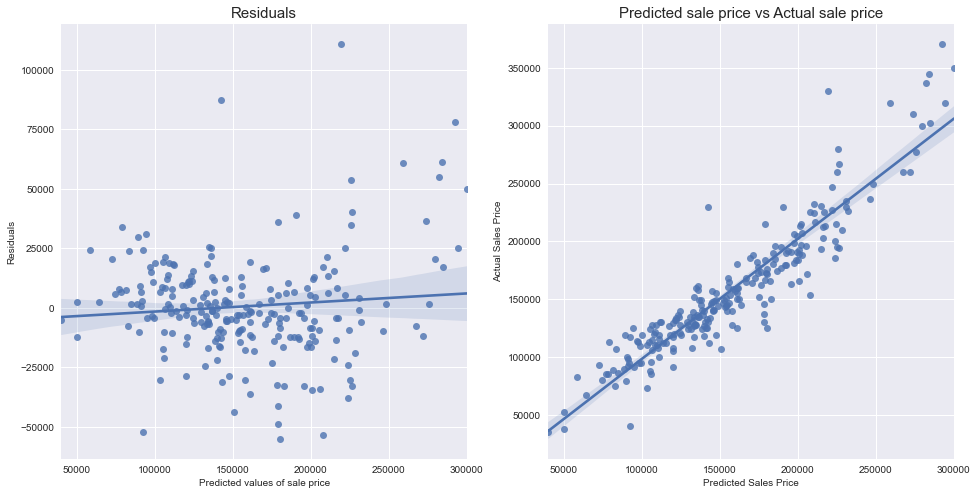

In [167]:
lasso_gs = evaluate_model(lasso_pipe, lasso_params, X_train, y_train, X_test, y_test)

### Train score is better than the test score suggest that the model might have slightly overfit. However the model explained almost 89% of the variations in sale price on test data!

In [168]:
def regression_coef(features, coef):
    return pd.DataFrame(list(zip(features, coef))).rename(columns={0:'feature', 
                                                                   1:'coef'}).sort_values(by='coef',
                                                                                          ascending=False)

In [179]:
lasso_coef = regression_coef(features, lasso_gs['lasso'].coef_)
lasso_coef

,feature,coef
119,gr_liv_area,15647.927399
174,overall_qual,10538.668204
81,year_built,7501.641072
113,bsmtfin_sf_1,7208.743186
76,lot_area,5311.279134
94,overall_cond,4137.025922
171,exter_qual,3117.844500
148,exterior_1st_BrkFace,3097.390035
162,neighborhood_NoRidge,2896.623859
112,neighborhood_NridgHt,2863.313716


### Retrain the model with full data

In [170]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [171]:
X_ss.shape, y.shape

((1196, 195), (1196,))

In [172]:
lasso = lasso_gs['lasso'].fit(X_ss, y)

In [173]:
#apply the selected features on the test set
X_test_features = [f for f in features if f !='saleprice']
X_testdata = test_df_ohe[X_test_features]
X_testdata.shape

(879, 195)

In [174]:
#scale the test data
X_testdata_ss = ss.transform(X_testdata)

In [175]:
y_predictions = lasso.predict(X_testdata_ss)

In [176]:
def to_csv(y_pred):

    df = pd.read_csv('../data/test.csv', usecols=['Id'])
    df['saleprice'] = y_pred

    df.to_csv(f"../data/prediction_{datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}.csv", index=False)

In [177]:
to_csv(y_predictions)

## Conclusion


The model score a 0.899 as compared to the baseline score of 0.893. This shows that lasso regression model does a slightly better job predicting the prices than the linear regression model. This is expected as lasso regression aims to reduce overfitting by shinking or reduce down to zero on the features coefficient. 

By using feature engineering, feature elimination, regularization, and target variable transformation, we can reduce loss and greatly improve the performance of the model.

With this model in place, it will allow us to provide better investment advise such that if any houses on the market is valued below what we predicted, we BUY!

